In [1]:
import pandas as pd
import numpy as np
import sqlite3
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import sqlite3
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import statsmodels
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

In [2]:
# Connect to the database. If it does not exist, it will be created
conn = sqlite3.connect(r'C:\Users\15404\Documents\GitHub\research_project\sql_db\test3.db')
# Create a cursor object. This is how we interact with the database
curs = conn.cursor()


### IMPORTANT!!! ###
# By default, sqlite does not enforce foreign key constraints. 
# According to the documentation, this is for backwards compatibility. You have to turn them on yourself.
curs.execute('PRAGMA foreign_keys=ON;')

finaldf = pd.read_sql("""SELECT * FROM tSoilNutrients
                      JOIN tSample ON tSoilNutrients.sample_id = tSample.sample_id;""", conn)

conn.close()

In [3]:
finaldf = finaldf.T.drop_duplicates().T

In [4]:
df = finaldf

In [5]:
nutrients = df.columns.drop(['sample_id','site_id','collect_date'])
print(nutrients)

Index(['OM', 'ENR', 'CEC', 'pH', 'BpH', 'Phosphorus', 'Potassium', 'Calcium',
       'Magnesium', 'Sulfur', 'Sodium', 'Zinc', 'Manganese', 'Iron', 'Copper',
       'Boron'],
      dtype='object')


## Scale Soil Nutrient DAta

In [6]:
df[nutrients] = StandardScaler().fit_transform(df[nutrients])  

In [7]:
df.head()

sample_id        OM       ENR       CEC        pH       BpH  Phosphorus  \
0    BLDTT0 -0.767038 -0.762875 -0.495412  1.237204  1.094195   -0.630036   
1    BLDTT1 -0.717554 -0.373569 -0.210168  1.237204  1.024142   -0.723866   
2    BLDTT2 -0.707657 -0.227580 -0.312041  1.237204  1.024142   -0.700409   
3    BLDTT3 -0.638378  0.356378 -0.067546  1.524363  1.234301   -0.676951   
4    BLDTT4 -0.658172  0.259052 -0.291666  1.380784  1.164248   -0.747324   

   Potassium   Calcium  Magnesium    Sulfur    Sodium      Zinc  Manganese  \
0   0.545165 -0.217367   0.091699 -1.222603 -1.480062 -0.584115   4.233046   
1   0.242216 -0.014262   0.581498 -1.069517 -1.031041 -0.552467   4.047939   
2   0.503853 -0.058900   0.193740 -1.222603 -1.480062 -0.473347   4.014283   
3   1.495320  0.123001   0.795786 -0.916432 -1.255551 -0.457523   4.350842   
4   0.035661 -0.115814   0.989665 -0.457176 -1.031041 -0.473347   4.283530   

       Iron    Copper     Boron site_id collect_date  
0 -0.850068  0.093356  0.038933     BLD    6/29/2020  
1 -0.534633  0.093356  0.690176     BLD    6/29/2020  
2 -1.136827  0.006161  0.364554     BLD    6/29/2020  
3 -1.079475  0.093356  1.015797     BLD    6/29/2020  
4 -0.678013  0.354940  0.690176     BLD    6/29/2020

## Create PCA of Soil Nutrients by Site

In [8]:
X = df[nutrients]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['site_id'])
fig.update_layout(
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

## Perform TSNE of Soil Nutrients by Site

In [9]:
from sklearn.manifold import TSNE

In [10]:
perplexity_value = 10 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(df[nutrients])

fig = px.scatter(tsne_transformed, x=0, y=1, color=df['site_id'])
fig.update_layout(title = 'Soil Nutrients by Site TSNE Perplexity-Value =' + str(perplexity_value))
fig.show()

In [11]:
perplexity_value = 50 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(df[nutrients])

fig = px.scatter(tsne_transformed, x=0, y=1, color=df['site_id'])
fig.update_layout(title = 'Soil Nutrients by Site TSNE Perplexity-Value = ' + str(perplexity_value))
fig.show()

## Perform PCA Based on North vs. South

In [12]:
##expand the site to either "0" for wintergreen or "1" for cole Mtn and "2" for Blacksburg
subdf = df
subdf['site_id'].replace({'CMB': 1, 'FRW': 1, 'LFS': 1, 'LM': 0, 'MMP': 1, 'MKP': 2,
                    'PNR': 2, 'PTW': 0, 'RF': 2, 'RGT': 0, 'RRL': 0, 'SGC': 0, 'SLG': 1}, inplace=True)
subdf = subdf[subdf["site_id"].isin([0,1,2])]

In [13]:
subdf.shape

(210, 19)

In [14]:
X = subdf[nutrients]

pca = PCA(n_components=2)
components = pca.fit_transform(X)
newnames = {'0':'Wintergreen', '1': 'Cole Mountain', '2': 'Blacksburg'}

fig = px.scatter(components, x=0, y=1, color=subdf['site_id'],
                labels={
                     '0': "Sepal Length (cm)",
                     '1': "Sepal Width (cm)",
                     '2': "Species of Iris"
                 },)
fig.update_layout(
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show()

## Perform TSNE Based on North vs. South

In [15]:
perplexity_value = 10 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(subdf[nutrients])

fig = px.scatter(tsne_transformed, x=0, y=1, color=subdf['site_id'])
fig.update_layout(title = 'Soil Nutrients by Site TSNE Perplexity-Value =' + str(perplexity_value))
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show()

## Import Species, Site, and Soil Nutrient Data

In [16]:
# Connect to the database. If it does not exist, it will be created
conn = sqlite3.connect(r'C:\Users\15404\Documents\GitHub\research_project\sql_db\test3.db')
# Create a cursor object. This is how we interact with the database
curs = conn.cursor()


### IMPORTANT!!! ###
# By default, sqlite does not enforce foreign key constraints. 
# According to the documentation, this is for backwards compatibility. You have to turn them on yourself.
curs.execute('PRAGMA foreign_keys=ON;')

fulldf = pd.read_sql("""SELECT *
                        FROM tPlantDNA AS t1
                        INNER JOIN tSoilNutrients AS t2 ON t1.sample_id = t2.sample_id
                        INNER JOIN tSample AS t3 ON t1.sample_id = t3.sample_id;""", conn)

conn.close()

In [17]:
fulldf = fulldf.T.drop_duplicates().T

In [18]:
nutrients = fulldf.columns.drop(['V1','V2','PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'sample_id', 'species', 'site_id', 'collect_date']) 
fulldf[nutrients] = fulldf[nutrients].astype(float)

In [19]:
nutrients

Index(['OM', 'ENR', 'CEC', 'pH', 'BpH', 'Phosphorus', 'Potassium', 'Calcium',
       'Magnesium', 'Sulfur', 'Sodium', 'Zinc', 'Manganese', 'Iron', 'Copper',
       'Boron'],
      dtype='object')

In [20]:
fulldf.head()

sample_id        V1        V2   species       PC1       PC2       PC3  \
0      RRL1  0.753244  0.246756  exaltata  0.194769  0.048276  -0.02388   
1      RRL9  0.581366  0.418634  exaltata  0.097719  0.094733  -0.00656   
2     RRL17  0.591513  0.408487  exaltata  0.099527  0.091996  0.004098   
3      FRW3  0.048066  0.951934   syriaca -0.139465 -0.064022 -0.009963   
4     FRW12  0.003946  0.996054   syriaca -0.155135  0.055455  0.009907   

        PC4       PC5    OM  ...  Magnesium  Sulfur  Sodium  Zinc  Manganese  \
0 -0.017138 -0.039842  19.4  ...      153.0     8.0    38.0   2.2       68.0   
1  0.012822 -0.022248  17.6  ...       89.0    13.0    17.0   2.1       72.0   
2 -0.021347   0.00719  14.7  ...      133.0     7.0    16.0   2.6       87.0   
3 -0.047536  0.024757  11.2  ...      127.0     9.0    21.0   6.4       50.0   
4 -0.043334 -0.009337  11.9  ...      130.0     7.0    20.0   4.7       49.0   

    Iron  Copper  Boron  site_id  collect_date  
0   82.0     4.1    0.3      RRL     6/25/2021  
1   98.0     3.4    0.2      RRL     6/25/2021  
2   76.0     1.8    0.2      RRL     6/25/2021  
3  112.0     2.4    0.9      FRW     6/25/2021  
4   94.0     1.8    0.9      FRW     6/25/2021  

[5 rows x 27 columns]

In [21]:
df = fulldf

## Scatter Plots of V2 vs. Nutrients

In [22]:
from scipy import stats

In [23]:
subdf = df

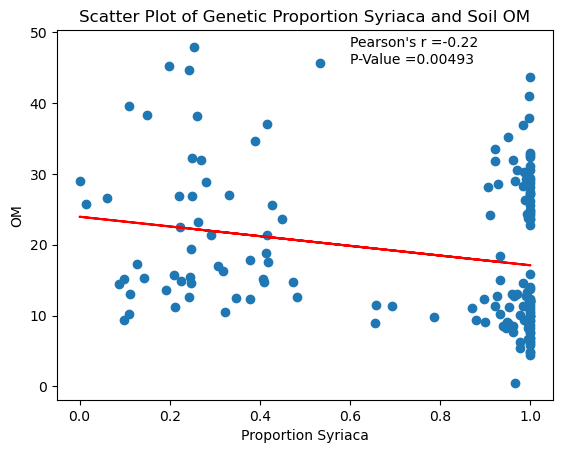

OM
Correlation coefficient value: -0.22125801408517964
Correlation P-Value: 0.004927921647274301


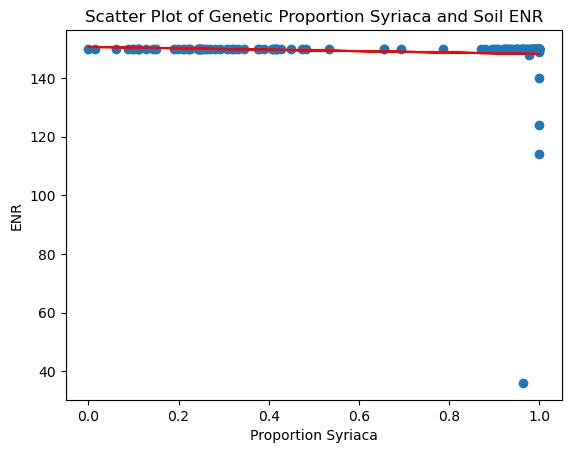

ENR
Correlation coefficient value: -0.08444619735614452
Correlation P-Value: 0.2883756392298


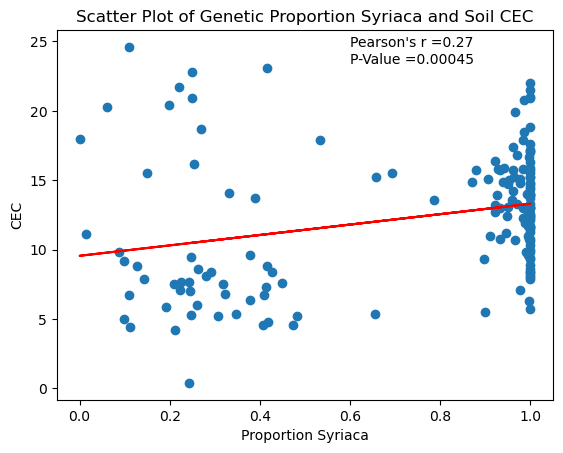

CEC
Correlation coefficient value: 0.2743578586858436
Correlation P-Value: 0.0004467834400717694


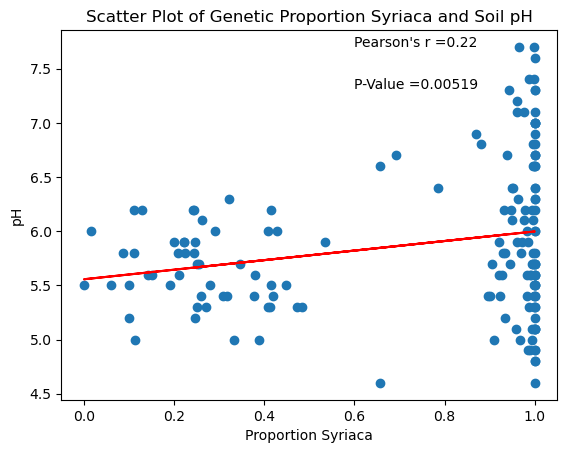

pH
Correlation coefficient value: 0.219958400529405
Correlation P-Value: 0.005193587068185429


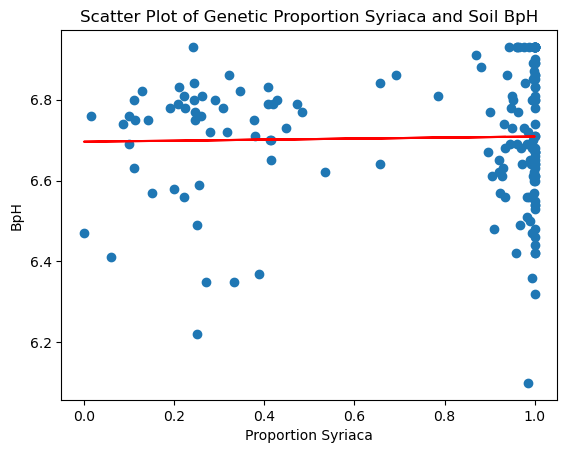

BpH
Correlation coefficient value: 0.026929860256682793
Correlation P-Value: 0.7353411477675431


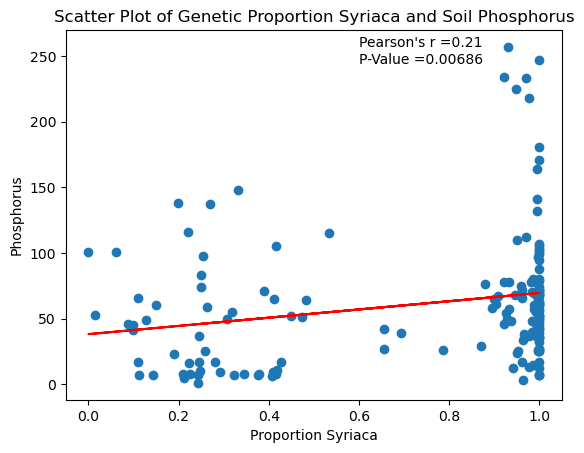

Phosphorus
Correlation coefficient value: 0.21295416891311789
Correlation P-Value: 0.006858360982868607


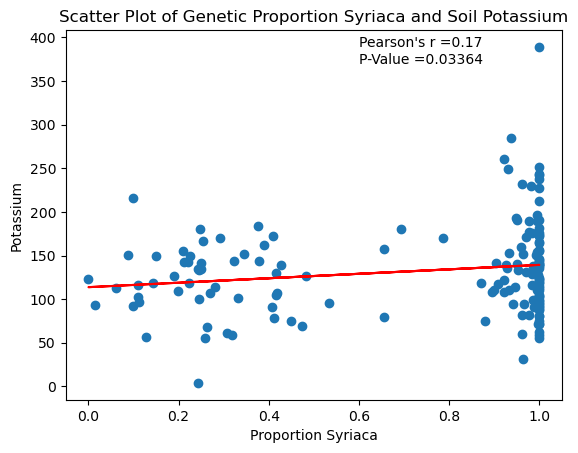

Potassium
Correlation coefficient value: 0.16806631244639625
Correlation P-Value: 0.03364042212482348


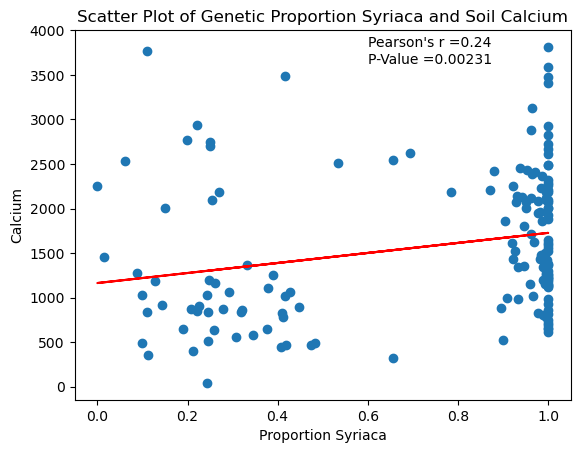

Calcium
Correlation coefficient value: 0.23924856238163675
Correlation P-Value: 0.002311921706101458


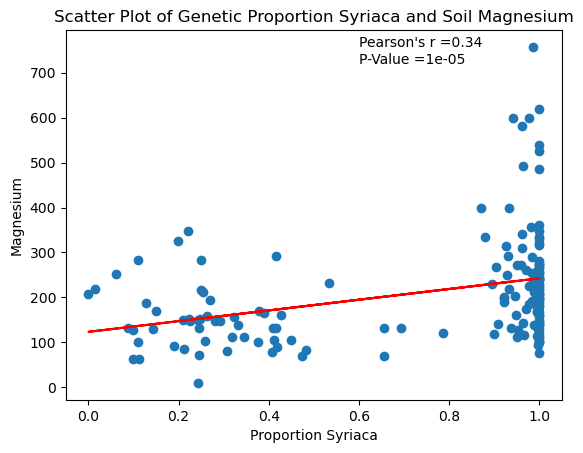

Magnesium
Correlation coefficient value: 0.3402095276531887
Correlation P-Value: 1.074416203607708e-05


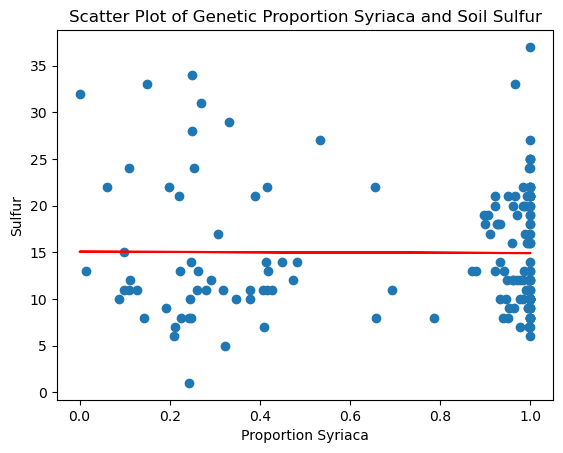

Sulfur
Correlation coefficient value: -0.008068345282891076
Correlation P-Value: 0.9193449941738788


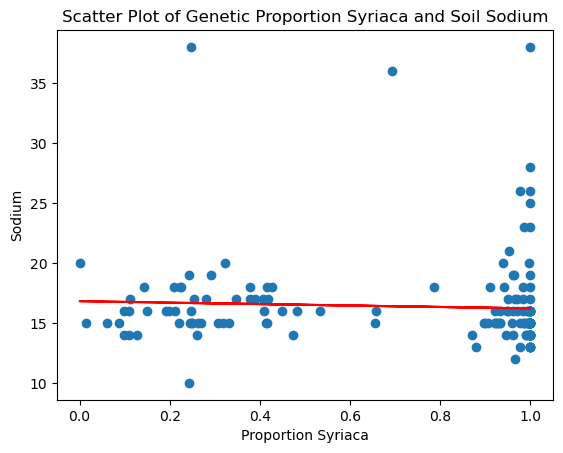

Sodium
Correlation coefficient value: -0.053558606570608513
Correlation P-Value: 0.5011764099405982


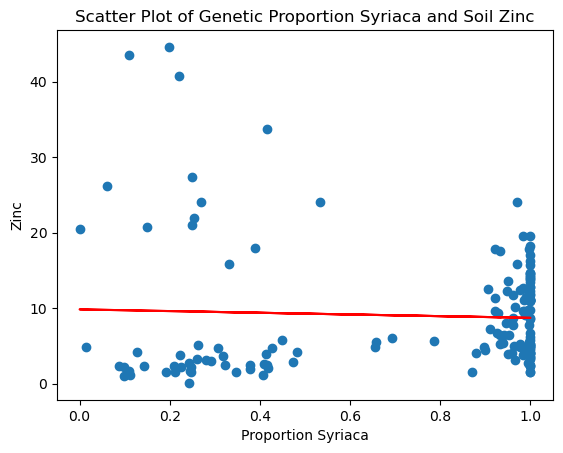

Zinc
Correlation coefficient value: -0.048207450019303266
Correlation P-Value: 0.544944905461154


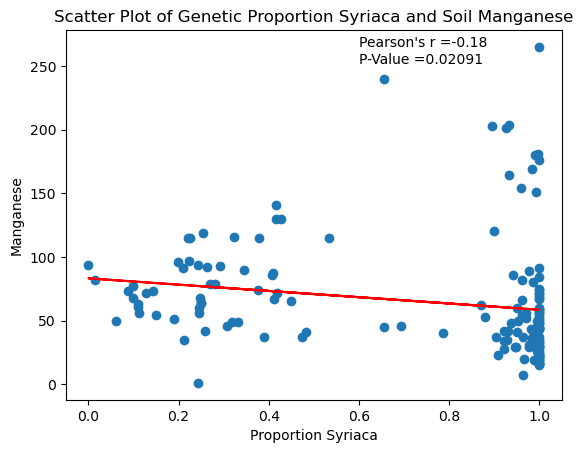

Manganese
Correlation coefficient value: -0.1824905727753347
Correlation P-Value: 0.020906187448509694


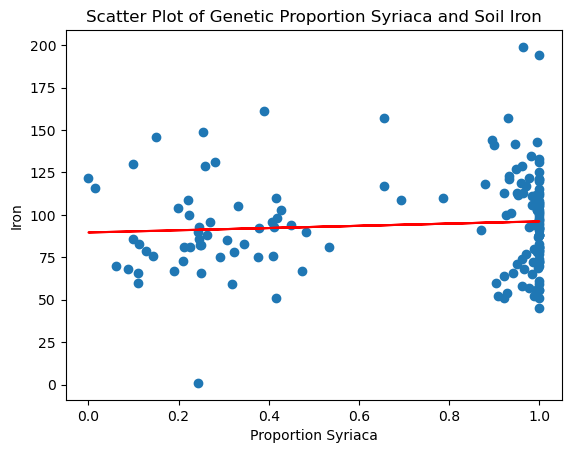

Iron
Correlation coefficient value: 0.0784671958475273
Correlation P-Value: 0.3239958936072368


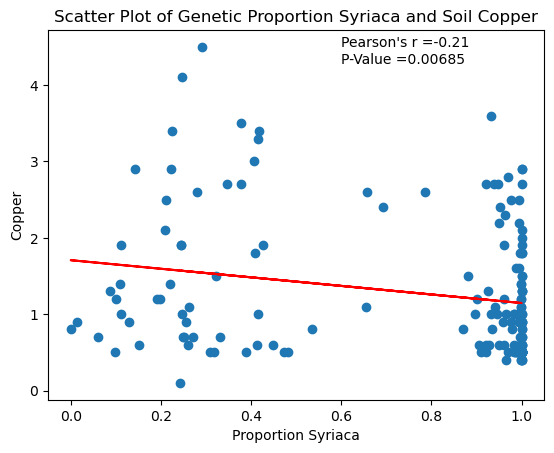

Copper
Correlation coefficient value: -0.2129964128903966
Correlation P-Value: 0.00684703981179926


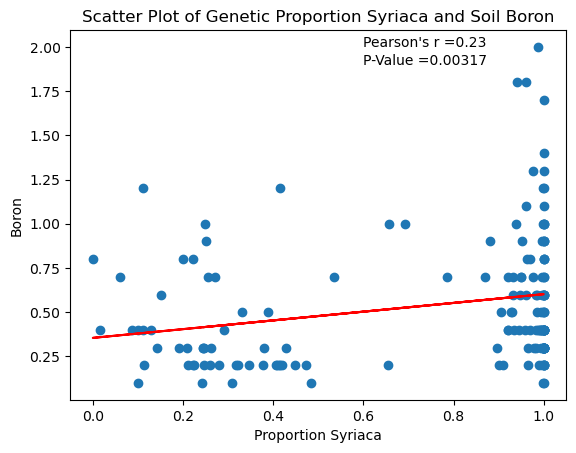

Boron
Correlation coefficient value: 0.23189707550736008
Correlation P-Value: 0.0031713380403339507


In [24]:
x_data = subdf['V2'].astype(float)

for i in nutrients:
    y_data = subdf[i].astype(float)
    
    corel_coef, p_value = stats.pearsonr(x_data, y_data)
    
    # Perform linear regression to calculate the best-fit line
    slope, intercept = np.polyfit(x_data, y_data, 1)

    # Create a scatter plot
    plt.scatter(x_data, y_data, label='Data Points')

    # Create the best-fit line using the slope and intercept
    best_fit_line = [slope * x + intercept for x in x_data]

    # Plot the best-fit line
    plt.plot(x_data, best_fit_line, color='red', label='Best Fit Line')

    # Add labels and a legend
    plt.xlabel('Proportion Syriaca')
    plt.ylabel(i)
    #plt.legend()

    # Show the plot
    plt.title(f'Scatter Plot of Genetic Proportion Syriaca and Soil {i}')
    
    if p_value < 0.05:
        plt.text(x_data.max()-.4, y_data.max(), f"Pearson's r ={round(corel_coef,2)}")
        plt.text(x_data.max()-.4, y_data.max()*.95, f"P-Value ={round(p_value, 5)}")

    plt.show()
    
    print(i)
    print(f'Correlation coefficient value: {corel_coef}')
    print(f'Correlation P-Value: {p_value}')

## PCA with Four Species: exaltata, syriaca, quadrifolia, hybrid

In [25]:
## Scale Nutrient Data
df[nutrients] = StandardScaler().fit_transform(df[nutrients])  

In [26]:
X = df[nutrients]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['species'])
fig.update_layout(
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

## PCA with only syriaca, exaltata, hybrid

In [27]:
df.shape

(160, 27)

In [28]:
df = df[df["species"].isin(['syriaca','exaltata', 'hybrid'])]

In [29]:
df.shape

(152, 27)

In [30]:
X = df[nutrients]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['species'])
fig.update_layout(
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

## Perform TSNE on syriaca, exaltata, and hybrids

In [31]:
perplexity_value = 5 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(df[nutrients])

fig = px.scatter(tsne_transformed, x=0, y=1, color=df['species'])
fig.update_layout(title = 'Soil Nutrients by Site TSNE Perplexity-Value =' + str(perplexity_value))
fig.show()

## Boxplots of Syriaca and Exaltata Soil Nutrients

In [32]:
# Connect to the database. If it does not exist, it will be created
conn = sqlite3.connect(r'C:\Users\15404\Documents\GitHub\research_project\sql_db\test3.db')
# Create a cursor object. This is how we interact with the database
curs = conn.cursor()


### IMPORTANT!!! ###
# By default, sqlite does not enforce foreign key constraints. 
# According to the documentation, this is for backwards compatibility. You have to turn them on yourself.
curs.execute('PRAGMA foreign_keys=ON;')

fulldf = pd.read_sql("""SELECT *
                        FROM tPlantDNA AS t1
                        INNER JOIN tSoilNutrients AS t2 ON t1.sample_id = t2.sample_id
                        INNER JOIN tSample AS t3 ON t1.sample_id = t3.sample_id;""", conn)

conn.close()

In [33]:
fulldf = fulldf.T.drop_duplicates().T

In [34]:
nutrients = fulldf.columns.drop(['V1','V2','PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'sample_id', 'species', 'site_id', 'collect_date']) 
fulldf[nutrients] = fulldf[nutrients].astype(float)

In [35]:
df = fulldf

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
subdf = df[df["species"].isin(['syriaca', 'exaltata'])]

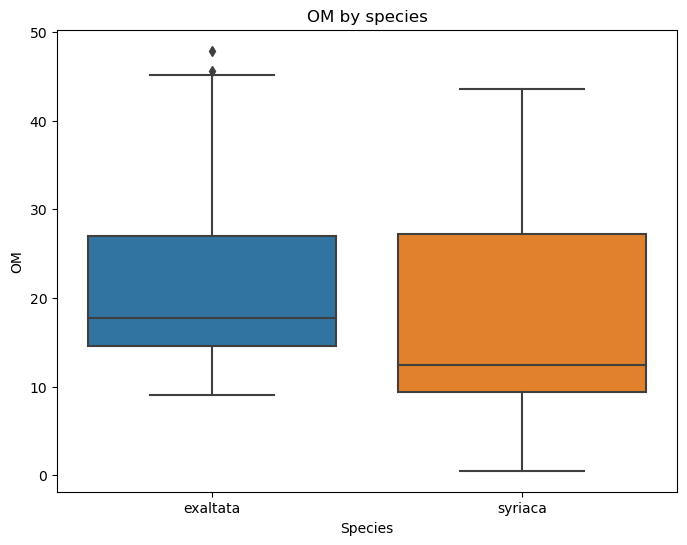

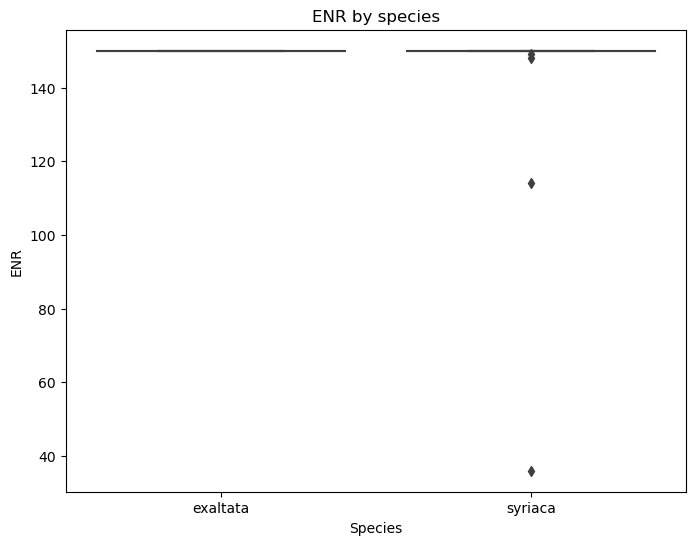

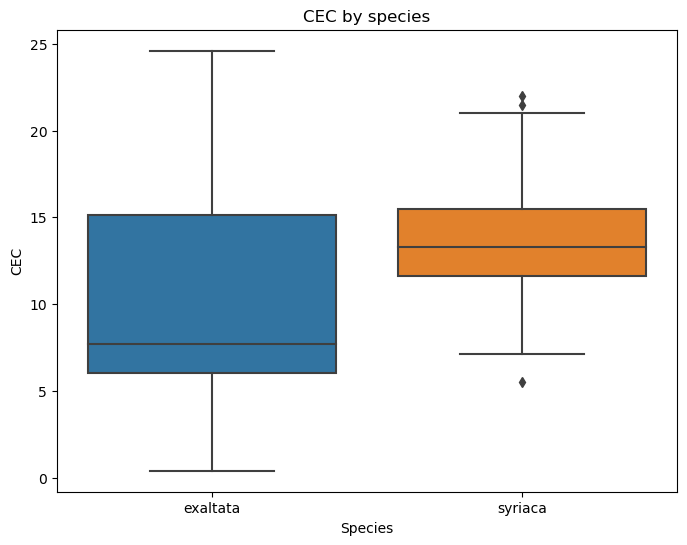

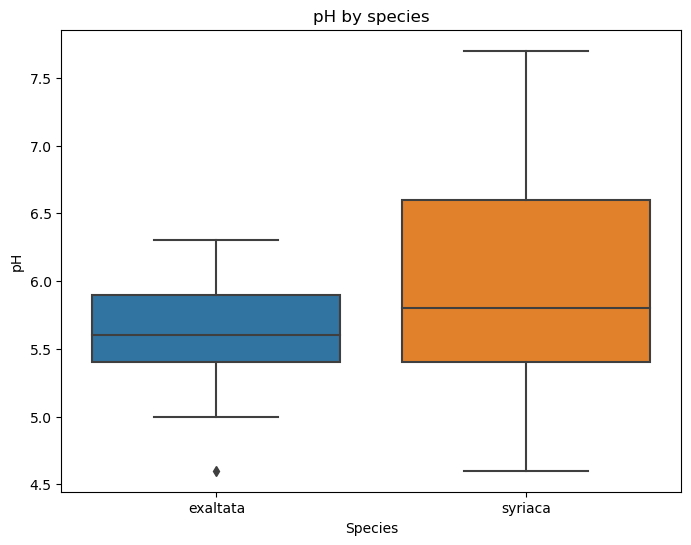

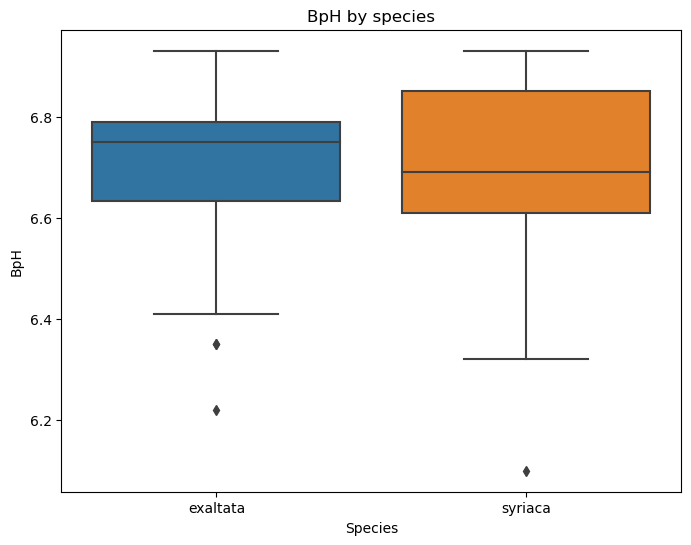

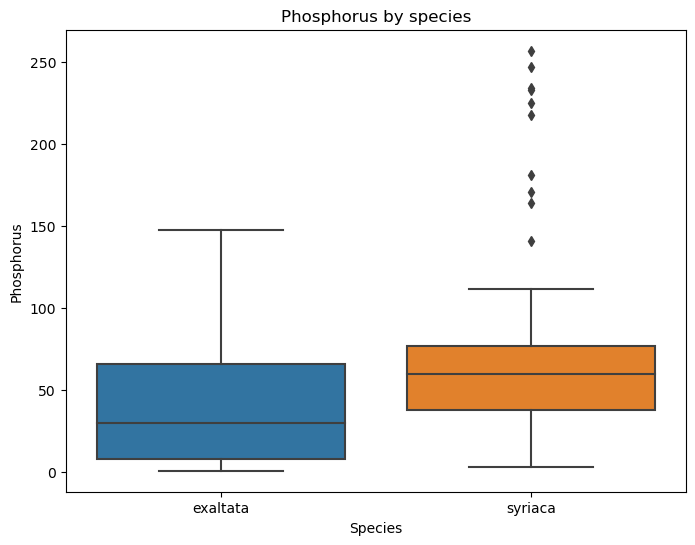

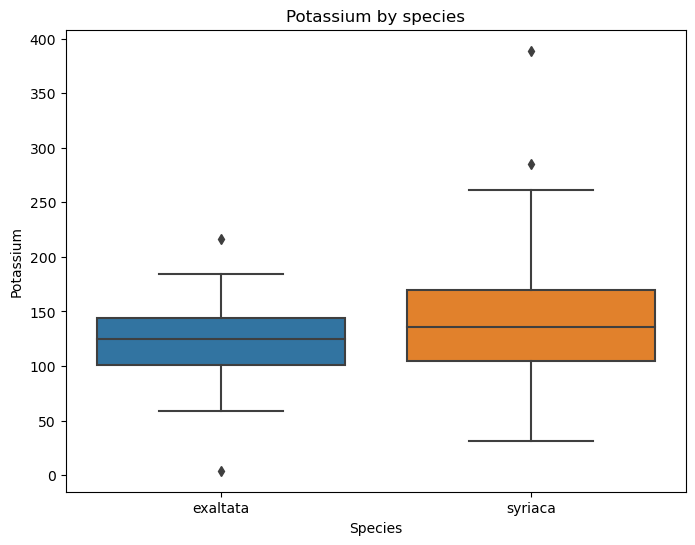

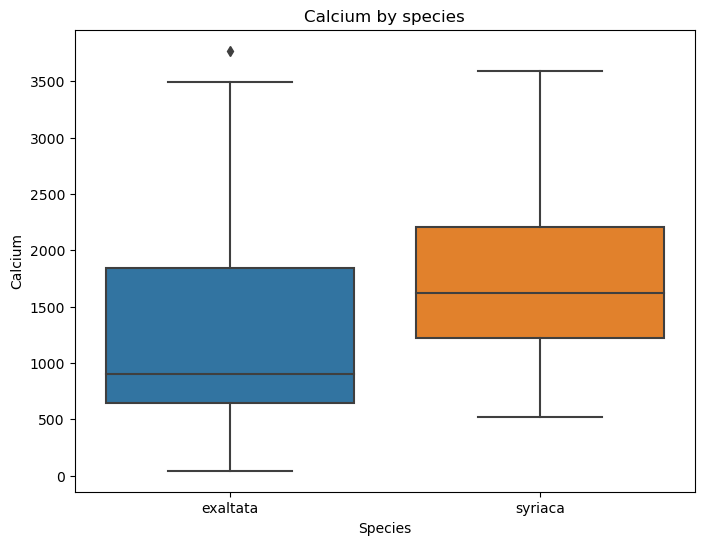

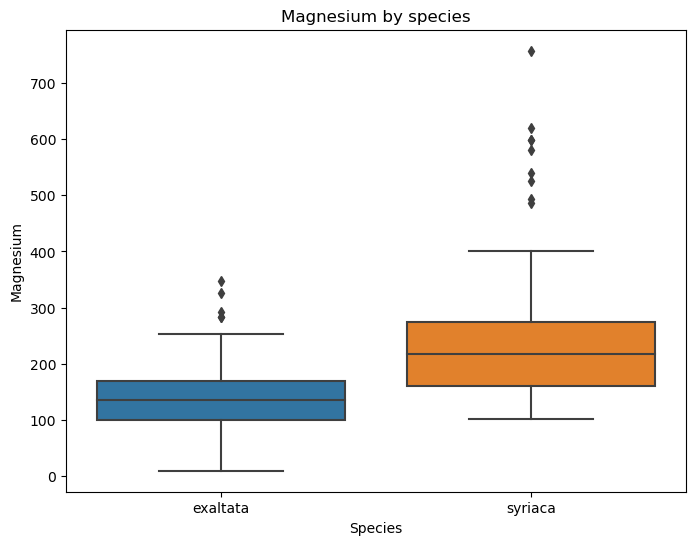

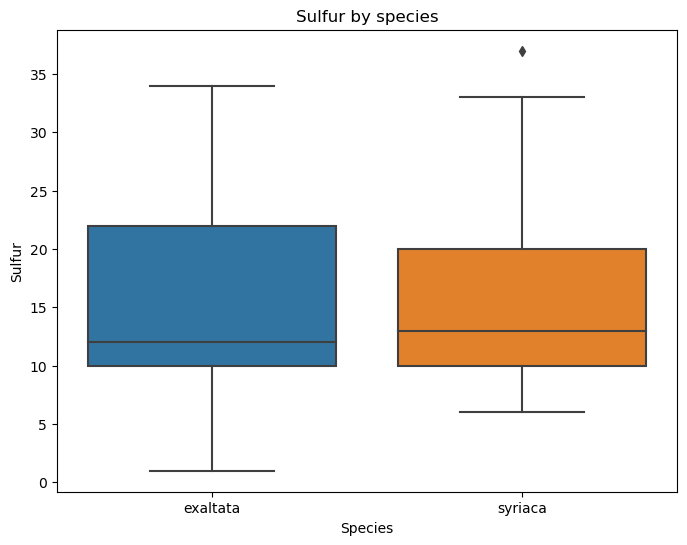

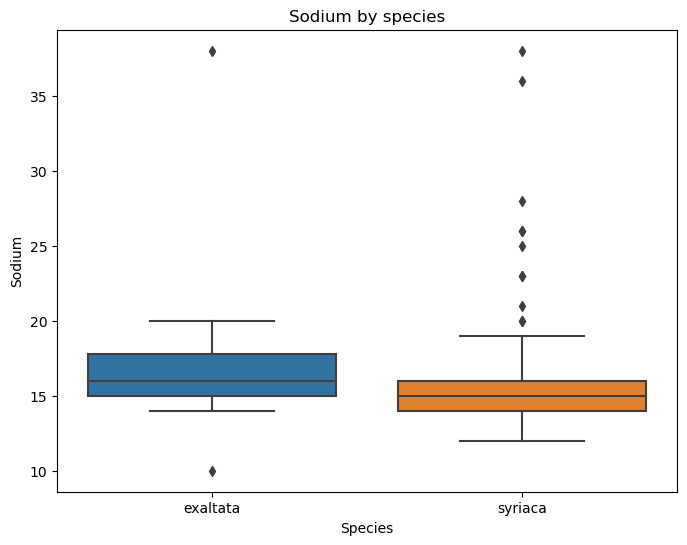

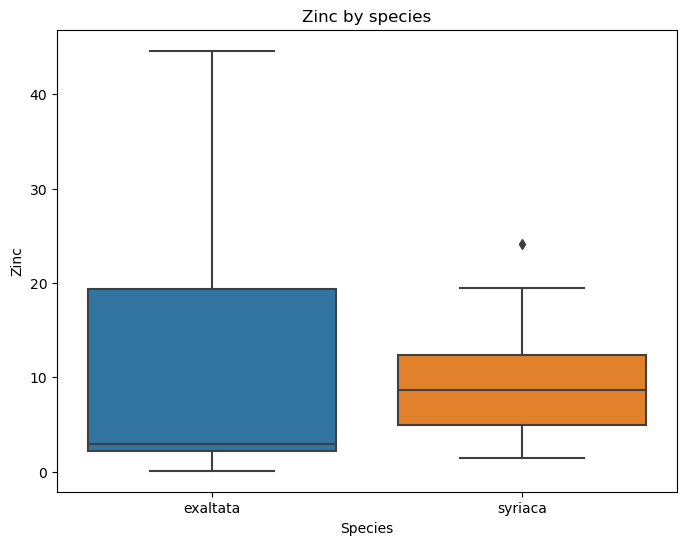

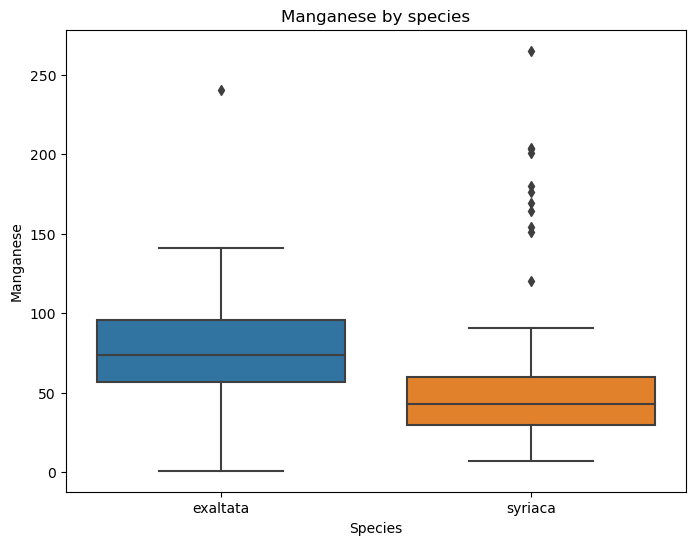

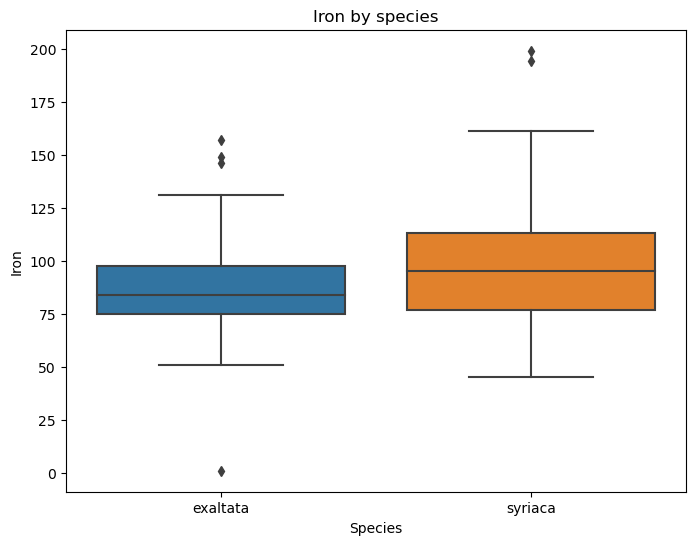

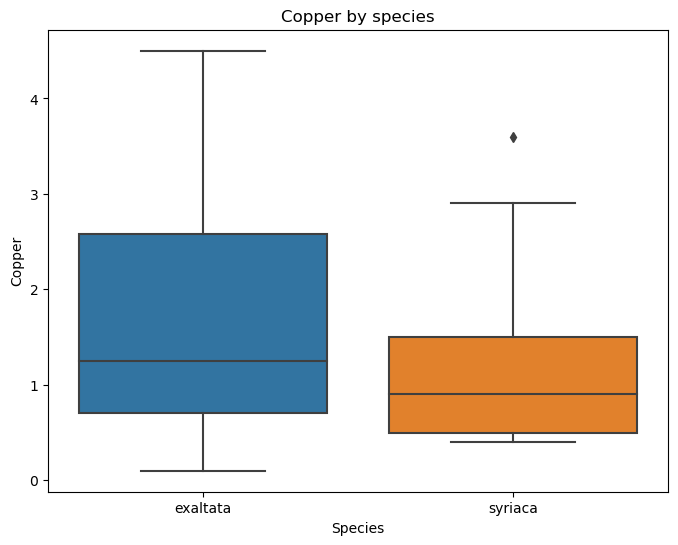

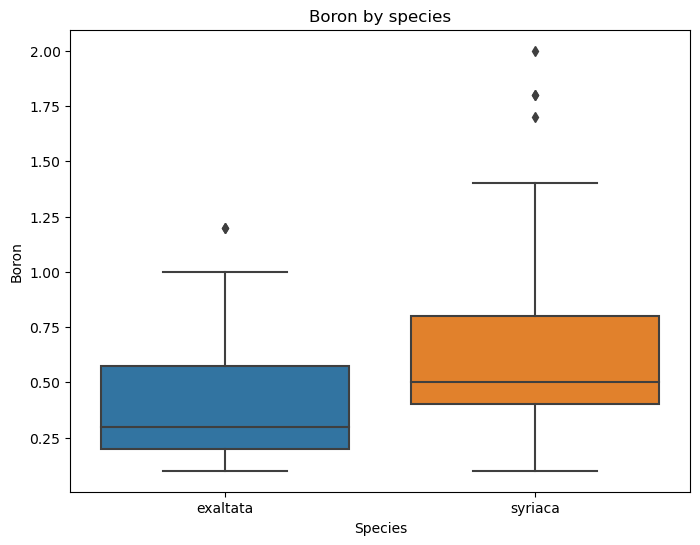

In [38]:
for i in nutrients:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='species', y=i, data=subdf)
    plt.title(i + ' by species')
    plt.xlabel('Species')
    plt.ylabel(i)
    plt.show()